In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from highlight_text import fig_text, ax_text
from pyfonts import load_font
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [2]:
penguins = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2025/2025-04-15/penguins.csv')
penguins_raw = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2025/2025-04-15/penguins_raw.csv')

In [3]:
df = penguins_raw

In [4]:
df["Date"] = pd.to_datetime(df["Date Egg"])
df['Month and Day'] = pd.to_datetime(df['Date'].dt.strftime('2000-%b-%d'))
df["Egg Count"] = np.where(df["Clutch Completion"] == "Yes", 1, 0.5)

In [5]:
df["Species"] = df["Species"].replace({"Adelie Penguin (Pygoscelis adeliae)": "Adélie", "Chinstrap penguin (Pygoscelis antarctica)": "Chinstrap", "Gentoo penguin (Pygoscelis papua)": "Gentoo"})

In [6]:
sort_order_dict = {"Adélie":1, "Chinstrap":3, "Gentoo":2}

In [7]:
df = (
    df.groupby(["Species", "Month and Day"], as_index=False)["Egg Count"]
      .sum()
      .sort_values(by=["Species", "Month and Day"], key=lambda x: x.map(sort_order_dict))
)

In [8]:
df

,Species,Month and Day,Egg Count
0,Adélie,2000-11-02,2.0
1,Adélie,2000-11-05,2.0
2,Adélie,2000-11-06,6.0
3,Adélie,2000-11-07,2.0
4,Adélie,2000-11-08,8.0
5,Adélie,2000-11-09,16.0
6,Adélie,2000-11-10,7.0
7,Adélie,2000-11-11,5.0
8,Adélie,2000-11-12,10.0
9,Adélie,2000-11-13,15.0


In [9]:
egg_max = df.groupby("Species")["Egg Count"].idxmax()
text_labels = df.loc[egg_max, ["Species", "Month and Day", "Egg Count"]].sort_values(by=["Species", "Month and Day"], key=lambda x: x.map(sort_order_dict)).reset_index(drop=True)

In [10]:
text_labels

,Species,Month and Day,Egg Count
0,Adélie,2000-11-16,25.0
1,Gentoo,2000-11-27,21.0
2,Chinstrap,2000-11-21,13.0


In [11]:
caslon_regular = load_font(
    font_url="https://github.com/impallari/Libre-Caslon-Text/blob/master/fonts/TTF/LibreCaslonText-Regular.ttf?raw=true"
)

caslon_bold = load_font(
    font_url="https://github.com/impallari/Libre-Caslon-Text/blob/master/fonts/TTF/LibreCaslonText-Bold.ttf?raw=true"
)

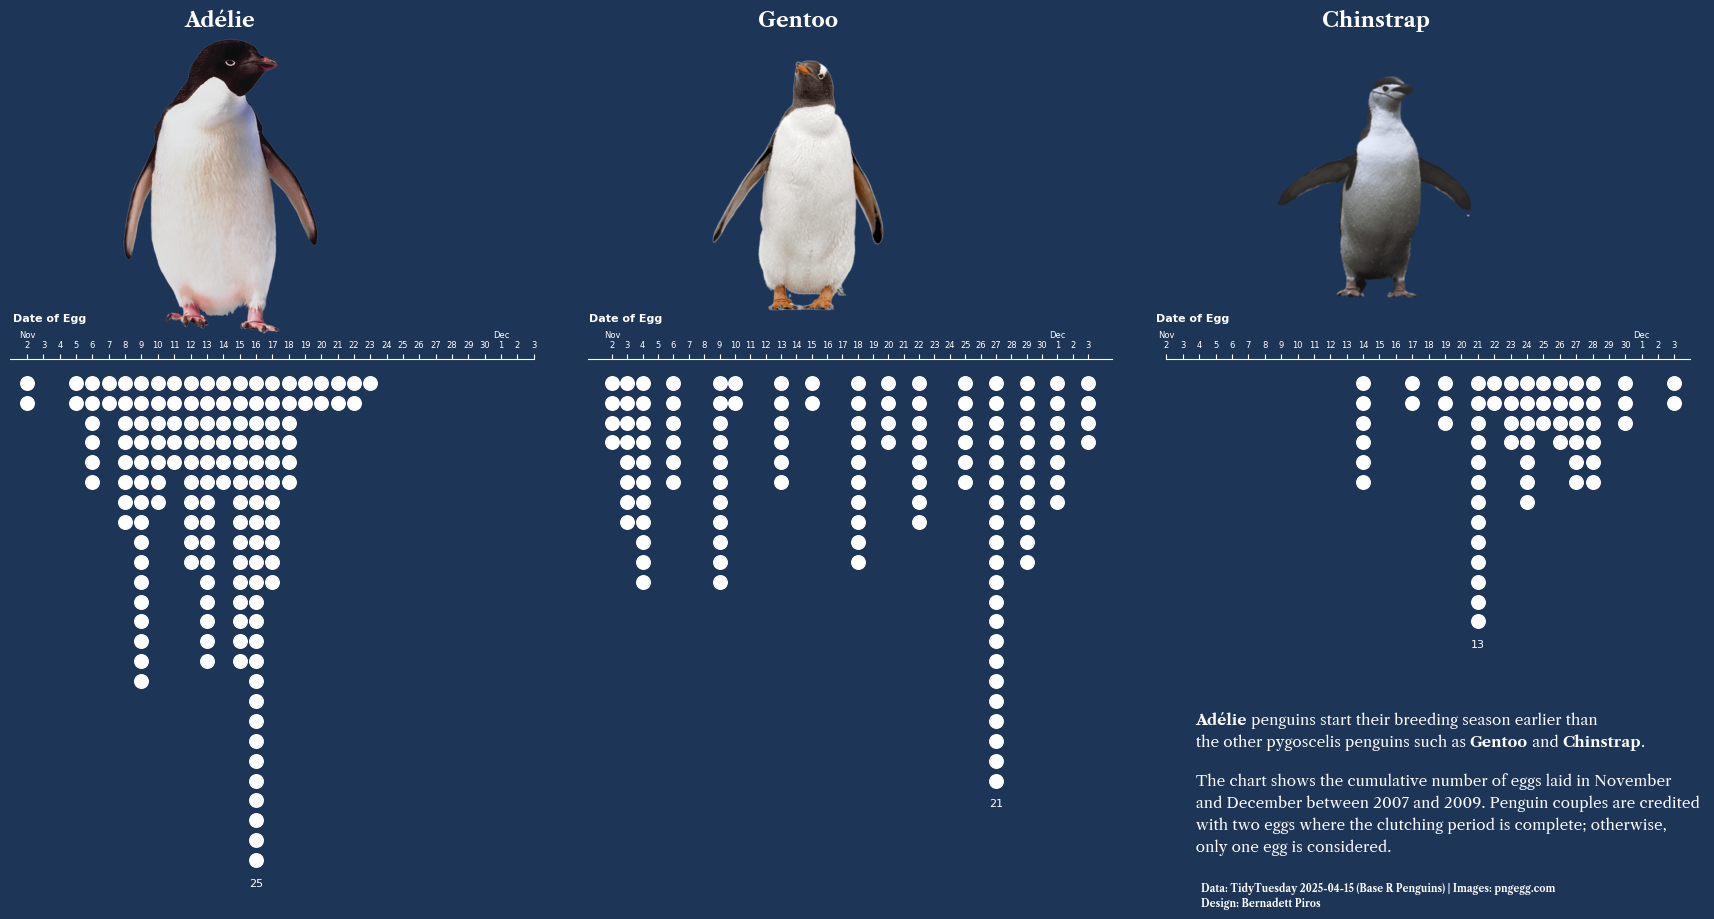

In [12]:
groups = df['Species'].unique()
n_groups = len(groups)

fig, axes = plt.subplots(nrows=1, ncols=n_groups, figsize=(6 * n_groups, 10), sharey=True)

for ax, group in zip(axes.flatten(), groups):
    sub_df = df[df['Species'] == group]
    
    x_vals = []
    y_vals = []
    
    for i, row in sub_df.iterrows():
        count = int(row['Egg Count'])
        x_vals.extend([row['Month and Day']] * count)
        y_vals.extend(np.arange(1, count + 1))

    labels_subset = text_labels[text_labels["Species"] == group]  
    x = labels_subset["Month and Day"].iloc[0]  
    y = labels_subset["Egg Count"].iloc[0]  
    v = labels_subset["Egg Count"].iloc[0].astype(int)     
    ax.text(x, y+1.3, s=f"{v}", color="white", fontsize=8, ha="center")
    
    ax.scatter(x_vals, y_vals, s=95, color="white")    
    ax.xaxis.set_label_position('top')
    ax.xaxis.tick_top()    
    ax.set_yticks([])
    ax.invert_yaxis()
    ax.spines[["left", "bottom", "right"]].set_visible(False)
    ax.spines['top'].set_color('white')    

    location = ["2000-11-02", "2000-11-03", "2000-11-04", "2000-11-05", "2000-11-06", "2000-11-07", "2000-11-08", "2000-11-09", "2000-11-10",
                "2000-11-11", "2000-11-12", "2000-11-13", "2000-11-14", "2000-11-15", "2000-11-16", "2000-11-17", "2000-11-18", "2000-11-19",
                "2000-11-20", "2000-11-21", "2000-11-22", "2000-11-23", "2000-11-24", "2000-11-25", "2000-11-26", "2000-11-27", "2000-11-28",
                "2000-11-29", "2000-11-30", "2000-12-01", "2000-12-02", "2000-12-03"]
    labels = ["Nov\n2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14", "15", "16", "17", "18", "19", "20",
              "21", "22", "23", "24", "25", "26", "27", "28", "29", "30", "Dec\n1", "2", "3"]
    ax.set_xticks(location, labels=labels)
    ax.tick_params(axis='x', colors="white", labelsize=6) 

    ax.set_facecolor("#1D3557")
    
child_ax1 = axes[0].inset_axes([0.2, 0.98, 0.4, 0.7])
child_ax2 = axes[1].inset_axes([0.2, 0.98, 0.4, 0.7])
child_ax3 = axes[2].inset_axes([0.2, 0.98, 0.4, 0.7])

child_axes = [child_ax1, child_ax2, child_ax3]

icon_paths = ['adelie_blue.png', 'gentoo_blue.png', 'chinstrap_blue.png']
df = pd.DataFrame({'icon': icon_paths})

for child_ax, icon_path, group in zip(child_axes, df['icon'], groups):
    img = mpimg.imread(icon_path)
    child_ax.imshow(img)
    child_ax.set_title(group, color="white", font=caslon_bold, size=15)
    child_ax.axis('off')  

fig.text(0.01, 0.625, "Date of Egg", color="white", size=8, weight="bold")
fig.text(0.33, 0.625, "Date of Egg", color="white", size=8, weight="bold")
fig.text(0.645, 0.625, "Date of Egg", color="white", size=8, weight="bold")

txt = '''
      <Adélie> penguins start their breeding season earlier than
      the other pygoscelis penguins such as <Gentoo> and <Chinstrap>.\n\n

      The chart shows the cumulative number of eggs laid in November
      and December between 2007 and 2009. Penguin couples are credited
      with two eggs where the clutching period is complete; otherwise,
      only one egg is considered.     
      '''

fig_text(0.8, 0.24, s=txt,
         font=caslon_regular, color="white", size=11, ha="center",
         highlight_textprops=[
             {"font": caslon_bold},
             {"font": caslon_bold},
             {"font": caslon_bold}])

fig.text(0.67, 0.04, "Data: TidyTuesday 2025-04-15 (Base R Penguins) | Images: pngegg.com\nDesign: Bernadett Piros",
         color="white", font=caslon_bold, size=7)

fig.set_facecolor("#1D3557")

plt.tight_layout()
plt.show()

#fig.savefig("2025-04-15.png", bbox_inches='tight', pad_inches=0.2)